# Sharpe Quotient und Portfoliowerte

In [1]:
import pandas as pd

In [2]:
import pandas_datareader.data as web

## Ein Portfolio erstellen

In [3]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2020-01-01')

In [4]:
# Wir erfassen ein paar Technologie Aktien für unser Portfolio


api_key='2a63c08d0b8317b023013f93caf899c67d09304e'

aapl = web.get_data_tiingo('AAPL', start=start, end=end, api_key=api_key)
cisco = web.get_data_tiingo('CSCO', start=start, end=end, api_key=api_key)
amzn = web.get_data_tiingo('AMZN', start=start, end=end, api_key=api_key)
ibm = web.get_data_tiingo('IBM', start=start, end=end, api_key=api_key)

In [5]:
aapl = aapl.droplevel(0)
cisco = cisco.droplevel(0)
ibm = ibm.droplevel(0)
amzn = amzn.droplevel(0)

In [6]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('BAYN_CLOSE')
amzn.to_csv('AMZN_CLOSE')

In [7]:
aapl.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2015-01-02 00:00:00+00:00,109.33,111.44,107.350,111.39,53204626,24.939486,25.420803,24.487825,25.409397,212818504,0.0,1.0
2015-01-05 00:00:00+00:00,106.25,108.65,105.410,108.29,64285491,24.236901,24.784370,24.045287,24.702250,257141964,0.0,1.0
2015-01-06 00:00:00+00:00,106.26,107.43,104.630,106.54,65797116,24.239182,24.506074,23.867360,24.303054,263188464,0.0,1.0
2015-01-07 00:00:00+00:00,107.75,108.20,106.695,107.20,40105934,24.579069,24.681720,24.338411,24.453608,160423736,0.0,1.0
2015-01-08 00:00:00+00:00,111.89,112.15,108.700,109.23,59364547,25.523453,25.582762,24.795776,24.916675,237458188,0.0,1.0


## Preise normalisieren

Das ist dasselbe wie die gesamten täglichen Renditewerte (cumulative daily returns).

In [8]:
# Beispiel
aapl.iloc[0]['adjClose']

24.9394863781

In [9]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['adjClose']/stock_df.iloc[0]['adjClose']

In [10]:
aapl.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Normed Return
date,,,,,,,,,,,,,
2015-01-02 00:00:00+00:00,109.33,111.44,107.350,111.39,53204626,24.939486,25.420803,24.487825,25.409397,212818504,0.0,1.0,1.000000
2015-01-05 00:00:00+00:00,106.25,108.65,105.410,108.29,64285491,24.236901,24.784370,24.045287,24.702250,257141964,0.0,1.0,0.971828
2015-01-06 00:00:00+00:00,106.26,107.43,104.630,106.54,65797116,24.239182,24.506074,23.867360,24.303054,263188464,0.0,1.0,0.971920
2015-01-07 00:00:00+00:00,107.75,108.20,106.695,107.20,40105934,24.579069,24.681720,24.338411,24.453608,160423736,0.0,1.0,0.985548
2015-01-08 00:00:00+00:00,111.89,112.15,108.700,109.23,59364547,25.523453,25.582762,24.795776,24.916675,237458188,0.0,1.0,1.023415


In [11]:
aapl.tail()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Normed Return
date,,,,,,,,,,,,,
2019-12-24 00:00:00+00:00,284.27,284.89,282.92,284.69,12119714,70.579741,70.733678,70.244558,70.684021,48478856,0.0,1.0,2.830040
2019-12-26 00:00:00+00:00,289.91,289.98,284.70,284.82,23334004,71.980064,71.997444,70.686504,70.716298,93336016,0.0,1.0,2.886189
2019-12-27 00:00:00+00:00,289.80,293.97,288.12,291.12,36592936,71.952753,72.988098,71.535635,72.280488,146371744,0.0,1.0,2.885094
2019-12-30 00:00:00+00:00,291.52,292.69,285.22,289.46,36059614,72.379802,72.670294,70.815611,71.868336,144238456,0.0,1.0,2.902217
2019-12-31 00:00:00+00:00,293.65,293.68,289.52,289.93,25247625,72.908647,72.916095,71.883233,71.985030,100990500,0.0,1.0,2.923422


## Allokationen

Mal angenommen, wir hätten die folgenden Allokationen für unser gesamtes Portfolio:

* 30% in Apple
* 20% in Cisco
* 40% in Amazon
* 10% in IBM

Reflektieren wir diese Werte, indem wir unsere normierte Rendite (Normed Return) mit unseren Allokationen multiplizieren.

In [12]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.1,.4]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [13]:
cisco.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Normed Return,Allocation
date,,,,,,,,,,,,,,
2015-01-02 00:00:00+00:00,27.61,28.12,27.38,27.860,22926512,22.966611,23.390841,22.775292,23.174567,22926512,0.19,1.0,1.000000,0.200000
2015-01-05 00:00:00+00:00,27.06,27.45,27.00,27.320,29460603,22.509109,22.833520,22.459200,22.725383,29460603,0.00,1.0,0.980080,0.196016
2015-01-06 00:00:00+00:00,27.05,27.68,27.04,27.135,47297634,22.500791,23.024839,22.492473,22.571496,47297634,0.00,1.0,0.979717,0.195943
2015-01-07 00:00:00+00:00,27.30,27.40,26.98,27.140,27570801,22.708746,22.791929,22.442563,22.575655,27570801,0.00,1.0,0.988772,0.197754
2015-01-08 00:00:00+00:00,27.51,28.09,27.47,27.540,40906993,22.883429,23.365886,22.850156,22.908384,40906993,0.00,1.0,0.996378,0.199276


## Investition (Investment)

Nehmen wir an, wir würden eine Millionen Dollar in dieses Portfolio investieren.

In [14]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Gesamter Portfoliowert  (Total Portfolio Value)

In [15]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [16]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
date,,,,
2015-01-02 00:00:00+00:00,300000.000000,200000.000000,100000.000000,400000.000000
2015-01-05 00:00:00+00:00,291548.522821,196015.936254,98426.508700,391793.076624
2015-01-06 00:00:00+00:00,291575.962682,195943.498732,96303.838085,382847.141190
2015-01-07 00:00:00+00:00,295664.501966,197754.436798,95674.441565,386905.224945
2015-01-08 00:00:00+00:00,307024.604409,199275.624773,97753.918302,389550.110204


In [17]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [18]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
date,,,,
2015-01-02 00:00:00+00:00,300000.000000,200000.000000,100000.000000,400000.000000
2015-01-05 00:00:00+00:00,291548.522821,196015.936254,98426.508700,391793.076624
2015-01-06 00:00:00+00:00,291575.962682,195943.498732,96303.838085,382847.141190
2015-01-07 00:00:00+00:00,295664.501966,197754.436798,95674.441565,386905.224945
2015-01-08 00:00:00+00:00,307024.604409,199275.624773,97753.918302,389550.110204


In [19]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [20]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
date,,,,,
2015-01-02 00:00:00+00:00,300000.000000,200000.000000,100000.000000,400000.000000,1000000.000000
2015-01-05 00:00:00+00:00,291548.522821,196015.936254,98426.508700,391793.076624,977784.044400
2015-01-06 00:00:00+00:00,291575.962682,195943.498732,96303.838085,382847.141190,966670.440689
2015-01-07 00:00:00+00:00,295664.501966,197754.436798,95674.441565,386905.224945,975998.605274
2015-01-08 00:00:00+00:00,307024.604409,199275.624773,97753.918302,389550.110204,993604.257687


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

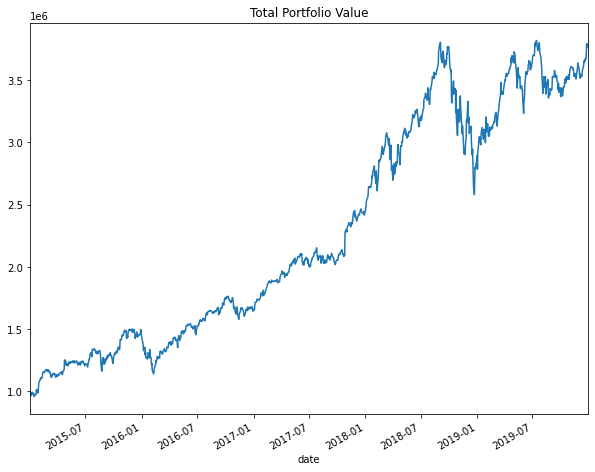

In [22]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

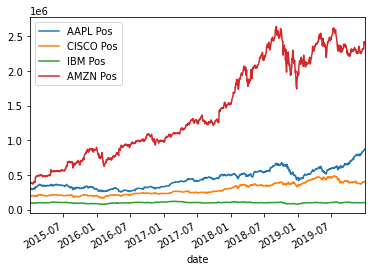

In [23]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [24]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
date,,,,,
2019-12-24 00:00:00+00:00,849011.968822,402454.439365,101617.462903,2.319733e+06,3.672817e+06
2019-12-26 00:00:00+00:00,865856.614772,403044.054492,101564.764559,2.422883e+06,3.793349e+06
2019-12-27 00:00:00+00:00,865528.084443,402370.208633,101835.784611,2.424219e+06,3.793953e+06
2019-12-30 00:00:00+00:00,870665.104130,400854.055450,99983.814255,2.394516e+06,3.766019e+06
2019-12-31 00:00:00+00:00,877026.645952,403970.592549,100909.799433,2.395747e+06,3.777654e+06


# Portfolio Statistiken
### Tägliche Rendite

In [25]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

### Gesamtrendite

In [26]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 277.7654477321879 was percent!


### Durchschnittliche tägliche Rendite

In [27]:
portfolio_val['Daily Return'].mean()

0.0011601750555536897

### Standardabweichung tägliche Rendite

In [28]:
portfolio_val['Daily Return'].std()

0.01431947423579281

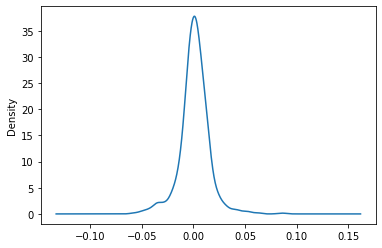

In [29]:
portfolio_val['Daily Return'].plot(kind='kde')

# Sharpe Quotient (Sharpe Ratio)

Der Sharpe Quotient ist ein Maß zur Berechnung von Risiko-angepasster Rendite. Dieser Quotient ist Industriestandard für solche Berechnungen geworden. 

Sharpe Quotient = (Durschnittliche Rendite des Portfolios - risikofreie Quote) / Standardabweichung der Rendite des Portfolios

Der originale Sharpe Quotient

Jährlicher Sharpe Quotient = K-Wert * SQ

K-Werte für verschiedene Probenhäufigkeiten:

* Täglich = sqrt(252)
* Wöchentlich= sqrt(52)
* Monatlich = sqrt(12)

In der EU verwendet man eine sehr niedrige risikofreie Quote (die Quote, die Du bekommen würdest, wenn du Dein Geld einfach in einer Bank lassen würdest, ist in der EU zur Zeit sehr niedrig, sagen wir ~ 0% Zinsen). Falls Du in einem anderen Land mit höheren Quoten für deine Handelswährung lebst, kannst Du diesen Trick benutzen, um eine jährliche Quote in eine tägliche Quote umzuwandeln:

tägliche_quote = ((1.0 + jährliche_quote)**(1/252))-1

Andere Werte, die Leute benutzen, sind Sachen wie 3-monatige Staatsanleihen oder [LIBOR](http://www.investopedia.com/terms/l/libor.asp) / EURIBOR.

Lies mehr dazu: [Sharpe Quotient](http://www.investopedia.com/terms/s/sharperatio)

In [30]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [31]:
SR

0.08102078585076317

In [32]:
annual_SR = (252**0.5)*SR

In [33]:
annual_SR

1.2861651023288405

1 = gut 
2 = sehr gut
3 = Excelent